In [160]:
import pandas
import numpy as np
df = pandas.read_csv('drive/My Drive/autos.csv', sep=",", encoding = 'Latin1')


df = df.drop(['name','seller', 'abtest', 'offerType', 'nrOfPictures', 'lastSeen', 'abtest', 'postalCode', 'dateCreated', 'dateCrawled'], axis=1)

display(df)

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,480,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
1,18300,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja
2,9800,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN
3,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein
...,...,...,...,...,...,...,...,...,...,...,...
371523,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN
371524,1199,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein
371525,9200,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein
371526,3400,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN


In [161]:
# Look at distributions of the numerical columns
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000


In [162]:
# Eliminating outliers that do not make sense

print('records with <= 0 horsepower: ', len(df[df['powerPS'] <= 0].index))
print('records with > 1500 horsepower: ', len(df[df['powerPS'] > 1500].index)) #https://en.wikipedia.org/wiki/List_of_production_cars_by_horsepower has 2015 cars with max 1500PS
print('records with year > 2019: ', len(df[df['yearOfRegistration'] > 2019].index))
print('records with year < 1900: ', len(df[df['yearOfRegistration'] < 1900].index))
print('records with price <= 10 ', len(df[df['price'] <= 10].index))
print('records with price > 1e6 ', len(df[df['price'] > 1e6].index))

df_removed_outliers = df[
                         (df['powerPS'] > 0) & (df['powerPS'] <= 1500)
                         & (df['yearOfRegistration'] >= 1900) & (df['yearOfRegistration'] < 2020)
                         & (df['price'] > 10) & (df['price'] < 1e6)
                      ]

records with <= 0 horsepower:  40820
records with > 1500 horsepower:  207
records with year > 2019:  114
records with year < 1900:  68
records with price <= 10  12118
records with price > 1e6  65


,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
count,322771.000000,322771.000000,322771.000000,322771.000000,322771.000000
mean,6316.325237,2003.608199,126.477063,125516.062472,5.979939
std,11478.876584,7.211519,65.602833,39298.922014,3.586419
min,11.000000,1910.000000,1.000000,5000.000000,0.000000
25%,1400.000000,1999.000000,80.000000,100000.000000,3.000000
50%,3495.000000,2004.000000,116.000000,150000.000000,6.000000
75%,7950.000000,2008.000000,150.000000,150000.000000,9.000000
max,999999.000000,2019.000000,1500.000000,150000.000000,12.000000


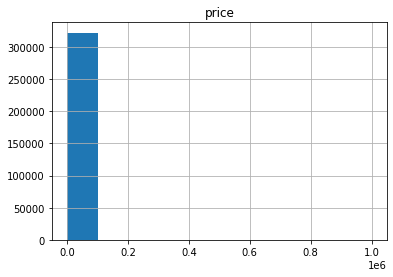

In [163]:
df_removed_outliers.hist(column='price')
df_removed_outliers.describe()

In [0]:
# Replace price by column log_price as it is highly right-skewed
log_price = np.log10(df_removed_outliers['price'])
log_price.name = 'log_price'
df_log = pandas.concat([df_removed_outliers, log_price], axis=1).drop(['price'], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f01732fe160>]],
      dtype=object)

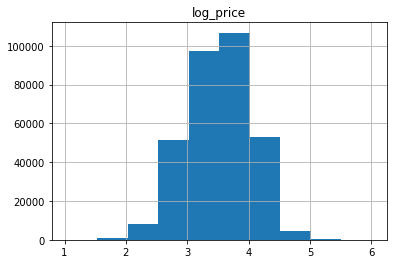

In [165]:
df_log.hist(column='log_price')

In [166]:
# Exploring distinct values for categorical variables
print(df_log['gearbox'].value_counts(dropna=False))
print()
print(df_log['notRepairedDamage'].value_counts(dropna=False))
print()
print(df_log['fuelType'].value_counts(dropna=False))
print()
print(df_log['vehicleType'].value_counts(dropna=False))
print()
print(df_log['brand'].value_counts(dropna=False))
print()
print(df_log['model'].value_counts(dropna=False))

manuell      245797
automatik     70828
NaN            6146
Name: gearbox, dtype: int64

nein    245516
NaN      47501
ja       29754
Name: notRepairedDamage, dtype: int64

benzin     198837
diesel      98261
NaN         19886
lpg          4853
cng           503
hybrid        247
andere         97
elektro        87
Name: fuelType, dtype: int64

limousine     87306
kleinwagen    70193
kombi         61529
bus           27570
NaN           21375
cabrio        21367
coupe         17300
suv           13588
andere         2543
Name: vehicleType, dtype: int64

volkswagen        69361
bmw               36266
opel              34017
mercedes_benz     31114
audi              29702
ford              21766
renault           14607
peugeot            9679
fiat               7996
seat               6244
skoda              5193
mazda              4955
smart              4611
citroen            4440
nissan             4270
toyota             4200
hyundai            3254
mini               3235
volvo   

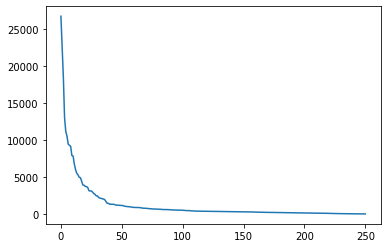

In [167]:
import matplotlib.pyplot as plt
plt.plot(df_log['model'].value_counts(dropna=False).values)

In [168]:
# Translating categorical variables to 0 and 1 values, and one-hot encoding the rest

#print(cats)
df['gearbox'].loc[df['gearbox'] == 'manuell'] = 1
df['gearbox'].loc[df['gearbox'] == 'automatik'] = 0
df = df.dropna(axis=0, subset=['gearbox'])

df['notRepairedDamage'].loc[df['notRepairedDamage'] == 'ja'] = 1
df['notRepairedDamage'].loc[df['notRepairedDamage'] == 'nein'] = 0
df = df.dropna(axis=0, subset=['notRepairedDamage'])

# One hot encoding, using drop_first to not introduce redundant columns
cats = pandas.get_dummies(df[['brand','vehicleType', 'fuelType', 'model']], drop_first=True)
df = df.drop(['brand','vehicleType', 'fuelType', 'model'], axis = 1)
years_old = 2016 - df['yearOfRegistration']
years_old.name ='years_old'
df = df.drop(['yearOfRegistration'], axis = 1)
df = pandas.concat([df, cats, years_old], axis = 1)
display(df)


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,price,gearbox,powerPS,kilometer,monthOfRegistration,notRepairedDamage,brand_audi,brand_bmw,brand_chevrolet,brand_chrysler,brand_citroen,brand_dacia,brand_daewoo,brand_daihatsu,brand_fiat,brand_ford,brand_honda,brand_hyundai,brand_jaguar,brand_jeep,brand_kia,brand_lada,brand_lancia,brand_land_rover,brand_mazda,brand_mercedes_benz,brand_mini,brand_mitsubishi,brand_nissan,brand_opel,brand_peugeot,brand_porsche,brand_renault,brand_rover,brand_saab,brand_seat,brand_skoda,brand_smart,brand_sonstige_autos,brand_subaru,...,model_spider,model_sportage,model_sprinter,model_stilo,model_superb,model_swift,model_terios,model_tigra,model_tiguan,model_toledo,model_touareg,model_touran,model_transit,model_transporter,model_tt,model_tucson,model_twingo,model_up,model_v40,model_v50,model_v60,model_v70,model_v_klasse,model_vectra,model_verso,model_viano,model_vito,model_vivaro,model_voyager,model_wrangler,model_x_reihe,model_x_trail,model_x_type,model_xc_reihe,model_yaris,model_yeti,model_ypsilon,model_z_reihe,model_zafira,years_old
1,18300,1,190,125000,5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
3,1500,1,75,150000,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15
4,3600,1,69,90000,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
5,650,1,102,150000,10,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21
6,2200,1,109,150000,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371521,1150,1,0,150000,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,16
371522,0,1,0,150000,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11
371524,1199,0,101,125000,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16
371525,9200,1,102,150000,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20


In [0]:
#create feature for days posted
# df[['dateCrawled','dateCreated']] = df[['dateCrawled','dateCreated']].apply(pandas.to_datetime)
# df['postedDays'] = (df['dateCrawled'] - df['dateCreated']).dt.days
# df['postedDays'].describe()

In [0]:
df.to_csv('processed.csv', index='False')